In [0]:
import tensorflow as tf

# Let's import the mnist dataset

In [0]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

In [48]:
print('Size of each image: '+str(train_images[1].shape))
print('Size of the training dataset: '+str(train_images.shape[0]))
print('Size of the testing dataset: '+str(test_images.shape[0]))
print('')

print('Shape of the training dataset: '+str(train_images.shape))
print('Shape of the training labels: '+str(train_labels.shape))

print('Shape of the testing dataset: '+str(test_images.shape))
print('Shape of the testing labels: '+str(test_labels.shape))

Size of each image: (28, 28)
Size of the training dataset: 60000
Size of the testing dataset: 10000

Shape of the training dataset: (60000, 28, 28)
Shape of the training labels: (60000,)
Shape of the testing dataset: (10000, 28, 28)
Shape of the testing labels: (10000,)


# Now, let's define a model

In [0]:
model1 = tf.keras.Sequential()

model1.add(tf.keras.layers.Flatten(input_shape=(28,28)))
# model.add(tf.keras.layers.Dense(50, activation = tf.nn.relu))
# model.add(tf.keras.layers.Dense(75, activation = tf.nn.relu))
# model.add(tf.keras.layers.Dense(120, activation = tf.nn.relu))
model1.add(tf.keras.layers.Dense(75, activation = tf.nn.relu))
model1.add(tf.keras.layers.Dense(20, activation = tf.nn.relu))
model1.add(tf.keras.layers.Dense(20, activation = tf.nn.relu))
model1.add(tf.keras.layers.Dense(10, activation = tf.nn.softmax))


**Then, we've got to define how the model compiles**

In [92]:
model1.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, mode='auto')

# categorical_crossentropy -> cost/loss function
# optimizer can also be adam

# Now, let's train the model that we've defined

In [93]:
model1.fit(train_images, train_labels, epochs=40)

Exception ignored in: <bound method ScopedTFStatus.__del__ of <tensorflow.python.framework.c_api_util.ScopedTFStatus object at 0x7fc1093479b0>>
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/c_api_util.py", line 39, in __del__
    c_api.TF_DeleteStatus(self.status)
AttributeError: 'ScopedTFStatus' object has no attribute 'status'


Epoch 1/40
60000/60000 [==============================] - 5s 91us/step - loss: 2.5307 - acc: 0.6248
Epoch 2/40
60000/60000 [==============================] - 4s 71us/step - loss: 0.5450 - acc: 0.8252
Epoch 3/40
60000/60000 [==============================] - 4s 70us/step - loss: 0.2880 - acc: 0.9260
Epoch 4/40
60000/60000 [==============================] - 4s 70us/step - loss: 0.2091 - acc: 0.9453
Epoch 5/40
60000/60000 [==============================] - 4s 70us/step - loss: 0.1750 - acc: 0.9550
Epoch 6/40
60000/60000 [==============================] - 4s 70us/step - loss: 0.1515 - acc: 0.9606
Epoch 7/40
60000/60000 [==============================] - 4s 68us/step - loss: 0.1414 - acc: 0.9625
Epoch 8/40
60000/60000 [==============================] - 4s 68us/step - loss: 0.1198 - acc: 0.9683
Epoch 9/40
60000/60000 [==============================] - 4s 67us/step - loss: 0.1164 - acc: 0.9691
Epoch 10/40
60000/60000 [==============================] - 4s 67us/step - loss: 0.1063 - acc: 0.9715

# Then, we evaluate the model that we've just trained

In [94]:
test_loss, test_accuracy = model1.evaluate(test_images, test_labels)
train_loss, train_accuracy = model1.evaluate(train_images, train_labels)

print('Accuracy on the test set: '+str(test_accuracy))
print('Accuracy on the train set: '+str(train_accuracy))

60000/60000 [==============================] - 2s 31us/step
Accuracy on the test set: 0.9717
Accuracy on the train set: 0.9929


In [99]:
predictions = model1.predict(test_images)
print(str(predictions))

[[4.2815151e-09 1.8919345e-04 7.5696578e-04 ... 9.9722677e-01
  1.1662396e-06 1.3287566e-03]
 [1.6060690e-04 1.9255211e-03 9.9419618e-01 ... 1.1071920e-03
  9.8495604e-04 1.7892936e-04]
 [9.2914355e-20 1.0000000e+00 1.2413482e-15 ... 1.5185703e-25
  2.7728412e-08 8.0822758e-20]
 ...
 [1.2526242e-34 1.1055953e-15 1.8049404e-36 ... 9.5905803e-13
  0.0000000e+00 1.8372238e-11]
 [2.4946084e-14 9.7422127e-19 6.2666195e-35 ... 1.4130152e-23
  4.9143545e-13 2.1048531e-11]
 [2.2615534e-22 1.9476100e-23 0.0000000e+00 ... 0.0000000e+00
  5.6359833e-23 0.0000000e+00]]


Prediction: 7


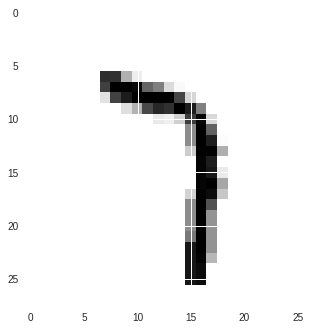

In [106]:
import numpy as np
toShow = 122

print('Prediction: '+str(np.argmax(predictions[toShow])))

import matplotlib.pyplot as plt

plt.imshow(test_images[toShow], cmap='binary')